<a href="https://colab.research.google.com/github/Devdutt3002/E-commerce-Data-Analysis/blob/main/Ecommerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ensure required packages are available in this kernel
%pip install -q pandas numpy matplotlib


# New Section


# E-commerce Sales Analysis (Intermediate)
This notebook performs an intermediate-level analysis on a Superstore-like e-commerce dataset.

**Contents:**

1. Data loading & cleaning
2. Exploratory Data Analysis (Sales, Profit, Top products, Regions)
3. KPI calculations
4. Correlation analysis
5. Simple monthly sales forecasting (Linear Regression)
6. Conclusions & recommendations

**Dataset:** `superstore_synthetic.csv` (generated for this project)



In [ ]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
# Load dataset
try:
    df = pd.read_csv(r"/content/superstore_synthetic.csv")
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    display(df.head(5))
except FileNotFoundError:
    print("File not found. Please upload the 'superstore_synthetic.csv' file.")
    # Add code to handle file upload here or provide instructions
    pass

,Order ID,Order Date,Customer ID,Region,State,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Sales,Discount,Profit,Payment Method
0,ORD100000,2021-05-10,CUST1280,Central,Michigan,Michigan City,Technology,Phones,Smartphone Model B,1,394.76,394.76,0.0,99.48,Bank Transfer
1,ORD100001,2021-11-10,CUST1865,East,Massachusetts,Massachusetts City,Furniture,Furnishings,Desk Lamp,1,2116.67,2116.67,0.0,757.63,Credit Card
2,ORD100002,2019-05-02,CUST1313,Central,Indiana,Indiana City,Technology,Computers,Laptop Pro,1,1360.31,1360.31,0.0,471.78,Credit Card
3,ORD100003,2020-04-11,CUST1697,Central,Ohio,Ohio City,Technology,Phones,Smartphone Model A,1,2726.21,2589.90,0.0,584.59,Credit Card
4,ORD100004,2019-11-27,CUST1941,West,Nevada,Nevada City,Technology,Accessories,USB-C Cable,1,2392.01,2392.01,0.0,143.94,Credit Card


In [ ]:
# Data cleaning & basic checks
if 'df' in locals() and df is not None:
    print("Rows, columns:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    # Convert numeric columns properly
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
    df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
    df.dropna(subset=['Sales','Profit'], inplace=True)
    # Add Year-Month column
    df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
    df['Profit Margin'] = (df['Profit'] / df['Sales']).round(3)
    display(df.head(3))
else:
    print("DataFrame 'df' not found. Please ensure the data file is loaded correctly in the previous cell.")

Rows, columns: (2000, 15)
Missing values:
 Order ID          0
Order Date        0
Customer ID       0
Region            0
State             0
City              0
Category          0
Sub-Category      0
Product Name      0
Quantity          0
Unit Price        0
Sales             0
Discount          0
Profit            0
Payment Method    0
dtype: int64


,Order ID,Order Date,Customer ID,Region,State,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Sales,Discount,Profit,Payment Method,YearMonth,Profit Margin
0,ORD100000,2021-05-10,CUST1280,Central,Michigan,Michigan City,Technology,Phones,Smartphone Model B,1,394.76,394.76,0.0,99.48,Bank Transfer,2021-05,0.252
1,ORD100001,2021-11-10,CUST1865,East,Massachusetts,Massachusetts City,Furniture,Furnishings,Desk Lamp,1,2116.67,2116.67,0.0,757.63,Credit Card,2021-11,0.358
2,ORD100002,2019-05-02,CUST1313,Central,Indiana,Indiana City,Technology,Computers,Laptop Pro,1,1360.31,1360.31,0.0,471.78,Credit Card,2019-05,0.347


Sales by Region:
 Region
West       903866.23
East       839878.71
Central    830828.23
South      802509.78
Name: Sales, dtype: float64

Sales by Category:
 Category
Technology         1823505.56
Office Supplies     812635.35
Furniture           740942.04
Name: Sales, dtype: float64


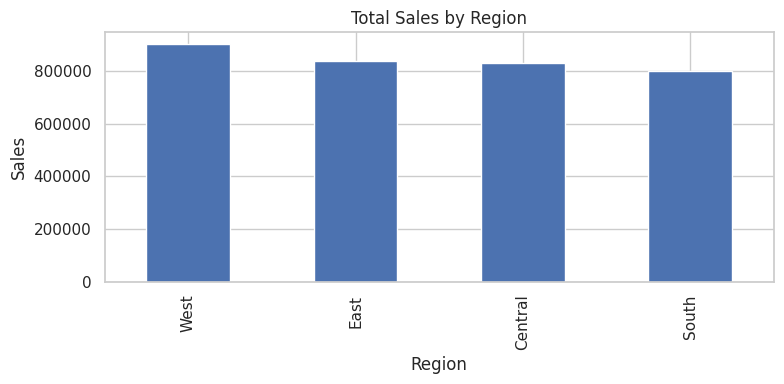

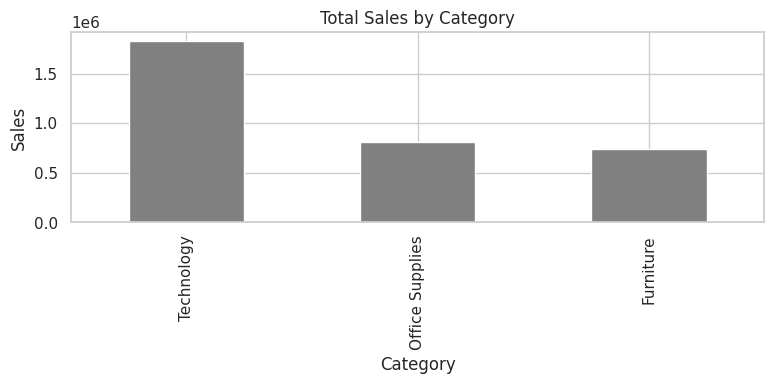

In [ ]:

# EDA: Sales by Region and Category
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("Sales by Region:\n", sales_region)
print("\nSales by Category:\n", sales_category)

plt.figure(figsize=(8,4))
sales_region.plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sales_category.plot(kind='bar', color='gray')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [ ]:

# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products


,Sales
Product Name,
Office Copier 3000,419606.35
Smartphone Model B,272392.91
Wireless Mouse,253248.89
Laptop Pro,243599.16
Smartphone Model A,226290.80
Desktop Elite,217771.62
USB-C Cable,190595.83
Wooden Bookcase,153985.90
Ballpoint Pen,126042.88


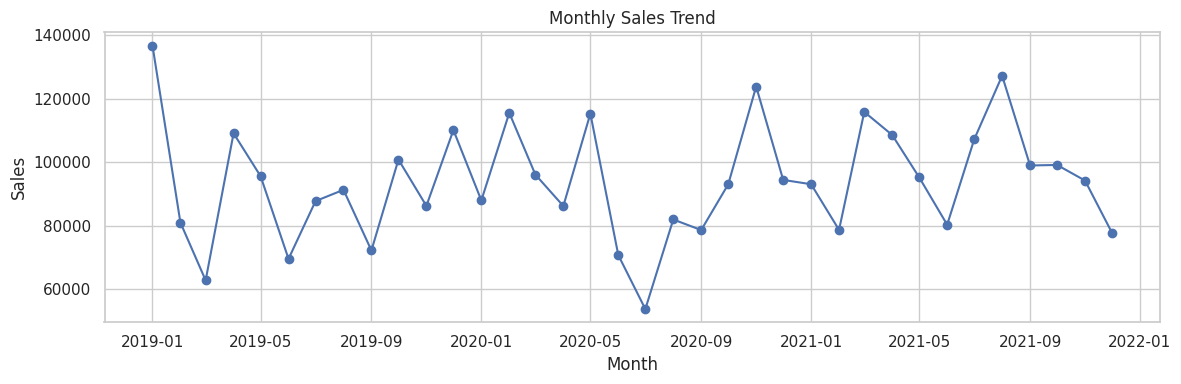

,YearMonth,Sales
0,2019-01-01,136810.43
1,2019-02-01,80983.48
2,2019-03-01,62763.87
3,2019-04-01,109133.66
4,2019-05-01,95601.57


In [ ]:

# Monthly Sales Trend
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'])
plt.figure(figsize=(12,4))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()
monthly_sales.head()


In [ ]:

# KPI calculations
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()
avg_profit_margin = df['Profit Margin'].mean()

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2%}")


Total Sales: 3,377,082.95
Total Profit: 749,322.22
Average Order Value: 1,688.54
Average Profit Margin: 22.64%


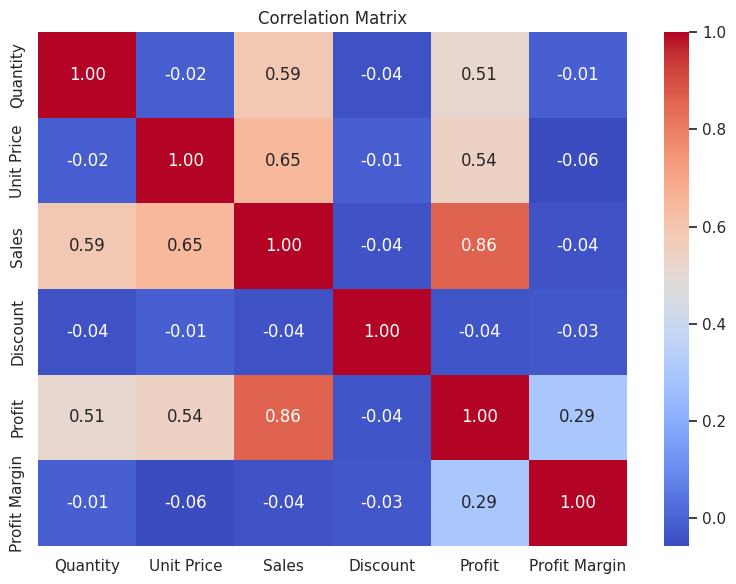

In [ ]:

# Correlation between numeric features
num_cols = ['Quantity','Unit Price','Sales','Discount','Profit','Profit Margin']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Linear Regression R2: -0.03139547581102997
RMSE: 14754.447250198278


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


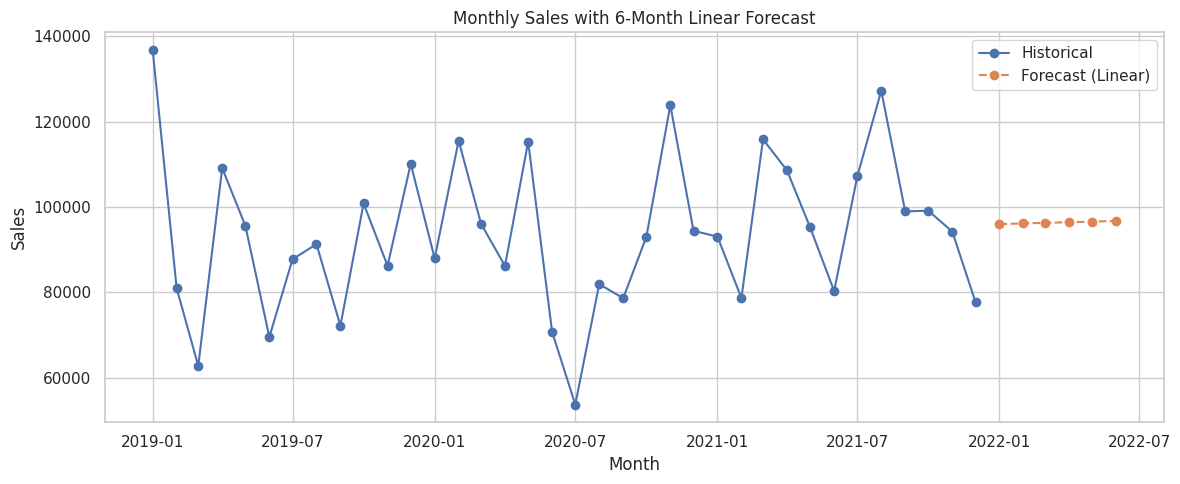

,YearMonth,Forecasted Sales
0,2022-01,96015.76
1,2022-02,96160.89
2,2022-03,96306.01
3,2022-04,96451.13
4,2022-05,96596.26
5,2022-06,96741.38


In [ ]:

# Simple Monthly Sales Forecast using Linear Regression on time index
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth_dt'] = pd.to_datetime(monthly_sales['YearMonth'])
monthly_sales = monthly_sales.sort_values('YearMonth_dt')
monthly_sales['t'] = np.arange(len(monthly_sales))  # time index

# Train a linear regression model
X = monthly_sales[['t']]
y = monthly_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Forecast next 6 months
future_t = np.arange(len(monthly_sales), len(monthly_sales)+6).reshape(-1,1)
future_pred = model.predict(future_t)

# Plot
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['YearMonth_dt'], monthly_sales['Sales'], label='Historical', marker='o')
future_idx = pd.date_range(start=monthly_sales['YearMonth_dt'].max() + pd.offsets.MonthBegin(1), periods=6, freq='MS')
plt.plot(future_idx, future_pred, label='Forecast (Linear)', marker='o', linestyle='--')
plt.title('Monthly Sales with 6-Month Linear Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Show forecast values
forecast_df = pd.DataFrame({'YearMonth': future_idx.strftime('%Y-%m'), 'Forecasted Sales': future_pred.round(2)})
forecast_df



# Conclusions & Recommendations
- The analysis provides insights on top-performing regions and categories, and highlights seasonal trends in sales.

- Recommendations:

  1. Focus promotions on underperforming regions identified in the EDA.

  2. Prioritize top 10 products for inventory optimization.

  3. Use the forecast to plan marketing spend for the next quarter.


**Next steps:** Build an interactive Power BI dashboard to present these KPIs and allow slicing by region, category, and time.

